# Assignment1

### 3.1 Pseudonymisation

Imports

In [233]:
import pandas as pd
import matplotlib.pyplot as plt
from anonymizedf.anonymizedf import anonymize

Import the data

In [234]:
df = pd.read_csv(r"athletes.csv")

/var/folders/lt/x1xcmh9n5xz2fgqn5y9_3kf40000gn/T/ipykernel_1151/3087902215.py:1: DtypeWarning: Columns (27) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"athletes.csv")


Remove rows with more than 5 NaN and columns with more than 500

In [235]:
df=df.dropna(thresh=23)
df = df.dropna(axis=1, thresh=len(df) - 500)

Display

In [236]:
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong
3,5164.0,Abo Brandon,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|
12,11416.0,Mike Abgarian,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|
20,21053.0,Douglas Acker,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|
21,21269.0,Erik Acevedo,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|
22,21685.0,Richard Ablett,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695.0,Carley Feil,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|
422421,385519.0,Dru Miller,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|
422518,92194.0,Robert North,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN
422754,539852.0,Ted Worden,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|


In [237]:
df.apply(pd.Series.nunique)

athlete_id    21747
name          21409
gender            2
age              43
height           58
candj           323
snatch          286
deadlift        431
backsq          404
train            74
experience       68
howlong          25
dtype: int64

Text(0.5, 1.0, 'Cardinality')

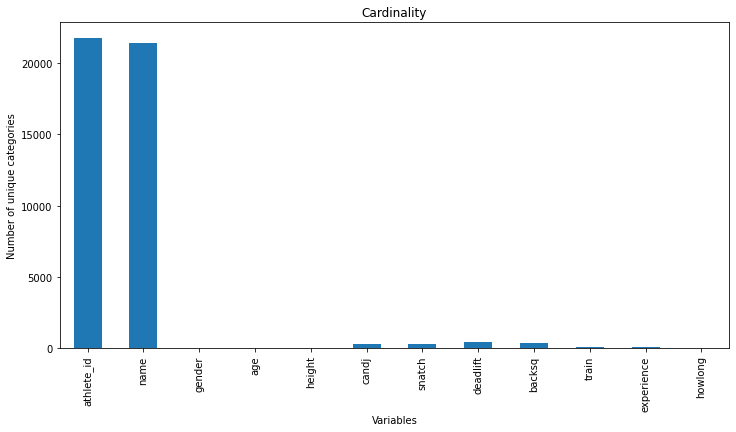

In [238]:
df.nunique().plot.bar(figsize=(12,6))
plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

### explicit personally identifiable information
are name and athlete_id attributes have the highest number of unique values so high cardinality <br> 
These values enable a one-to-one mapping to an individual

 Prepare the data to be anonymized

In [239]:
an = anonymize(df)

display name column and corresponding fake name column

In [240]:
an.fake_names("name")
df[['name', 'Fake_name']]

,name,Fake_name
3,Abo Brandon,Elliot Griffiths
12,Mike Abgarian,Dr Michelle Price
20,Douglas Acker,Ms Shirley Jarvis
21,Erik Acevedo,Dr Suzanne Lord
22,Richard Ablett,Miss Maria Matthews
...,...,...
422278,Carley Feil,Colin Morgan
422421,Dru Miller,Roger Taylor-Marsh
422518,Robert North,Amber Marshall
422754,Ted Worden,Dr Leonard Martin


display name athlete_id and corresponding fake id column

In [241]:
df['athlete_id'] = df['athlete_id'].astype('string').str.split('.').str[0]
an.fake_ids("athlete_id")
df[['athlete_id', 'Fake_athlete_id']]

,athlete_id,Fake_athlete_id
3,5164,EIKL92588821570216
12,11416,QZUG67309590033091
20,21053,AWJB45082192543531
21,21269,CLCT38589250970544
22,21685,PTJJ48626462902576
...,...,...
422278,553695,QMSI65663904170848
422421,385519,XHIJ40803230341617
422518,92194,GRNP09650208051756
422754,539852,USBB15347615054370


### 3.2 Randomisation

In [242]:
from faker import Faker
import random

#### Generate two lists of meaningful names for first and last names

Functions to generate names

Generate 21747(size of data set) random unique first and last names

In [243]:
fake = Faker()

first_names = set()
last_names = set()
while len(first_names) < 690 and len(last_names) < 1000:
    first_names.add(fake.first_name())
    last_names.add(fake.last_name())

first_names_list=list(first_names)
last_names_list=list(last_names)


generate a random name combination

In [244]:
def generate_random_name():
    return f"{random.choice(first_names_list)} {random.choice(last_names_list)}"

In [245]:
num_unique_names = 21747  

random_names = set()
while len(random_names) < num_unique_names:
    random_names.add(generate_random_name())

generate lookup table

In [246]:
lookup = pd.DataFrame({"original_name": df['name'], 
                    "random_name": list(random_names)}) 

lookup_table=dict(zip(lookup['random_name'], lookup['original_name']))

#get first 8 elements
list(lookup_table.items())[:8]

[('Jeffrey Ferrell', 'Abo Brandon'),
 ('Michaela Hudson', 'Mike Abgarian'),
 ('Debra Dennis', 'Douglas Acker'),
 ('Adriana Huang', 'Erik Acevedo'),
 ('Joanne Stout', 'Richard Ablett'),
 ('Christy Haley', 'Joe Abruzzo'),
 ('Ann Haley', 'Jerry Abadom'),
 ('Andres Soto', 'Brigham Abbott')]

replace real names with random ones

In [247]:
df['name']=lookup['random_name']
display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Jeffrey Ferrell,Male,40.0,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Elliot Griffiths,EIKL92588821570216
12,11416,Michaela Hudson,Male,31.0,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Michelle Price,QZUG67309590033091
20,21053,Debra Dennis,Male,42.0,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ms Shirley Jarvis,AWJB45082192543531
21,21269,Adriana Huang,Male,30.0,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Dr Suzanne Lord,CLCT38589250970544
22,21685,Joanne Stout,Male,28.0,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Miss Maria Matthews,PTJJ48626462902576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Kathryn Buchanan,Female,20.0,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Colin Morgan,QMSI65663904170848
422421,385519,Joe Roman,Male,28.0,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Roger Taylor-Marsh,XHIJ40803230341617
422518,92194,Caleb Hudson,Male,40.0,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Amber Marshall,GRNP09650208051756
422754,539852,Cheryl Sanchez,Male,27.0,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Leonard Martin,USBB15347615054370


try getting the original name from lookup table

In [248]:
lookup_table.get('Curtis Mayer')

### 3.3 Aggregation 

minimum age present is 14 and maximum 56

In [249]:
age_labels = ['10-20', '21-31', '32-42', '43-53', '54-64']
age_bins = [10, 20, 31, 42, 53,64]

In [250]:
df['age'] = pd.cut(df['age'], bins=age_bins, labels=age_labels, right=False)

display(df)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Jeffrey Ferrell,Male,32-42,67.0,245.0,200.0,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Elliot Griffiths,EIKL92588821570216
12,11416,Michaela Hudson,Male,32-42,65.0,290.0,225.0,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Michelle Price,QZUG67309590033091
20,21053,Debra Dennis,Male,43-53,72.0,325.0,235.0,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ms Shirley Jarvis,AWJB45082192543531
21,21269,Adriana Huang,Male,21-31,71.0,235.0,175.0,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Dr Suzanne Lord,CLCT38589250970544
22,21685,Joanne Stout,Male,21-31,70.0,187.0,134.0,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Miss Maria Matthews,PTJJ48626462902576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Kathryn Buchanan,Female,21-31,67.0,112.0,84.0,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Colin Morgan,QMSI65663904170848
422421,385519,Joe Roman,Male,21-31,70.0,200.0,155.0,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Roger Taylor-Marsh,XHIJ40803230341617
422518,92194,Caleb Hudson,Male,32-42,70.0,185.0,135.0,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Amber Marshall,GRNP09650208051756
422754,539852,Cheryl Sanchez,Male,21-31,69.0,185.0,135.0,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Leonard Martin,USBB15347615054370


3.4 Perturbation

In [251]:
import numpy as np

Add Gaussian noise to snatch attribute

In [252]:
df_with_noise = df.copy()
std_dev = df_with_noise["snatch"].std()
noise = np.random.normal(0, std_dev, len(df_with_noise))
df_with_noise["snatch"] += noise
display(df_with_noise)

,athlete_id,name,gender,age,height,candj,snatch,deadlift,backsq,train,experience,howlong,Fake_name,Fake_athlete_id
3,5164,Jeffrey Ferrell,Male,32-42,67.0,245.0,169.838383,375.0,325.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,4+ years|,Elliot Griffiths,EIKL92588821570216
12,11416,Michaela Hudson,Male,32-42,65.0,290.0,201.786939,465.0,405.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit by trying it alone (without a...,2-4 years|,Dr Michelle Price,QZUG67309590033091
20,21053,Debra Dennis,Male,43-53,72.0,325.0,271.197178,515.0,505.0,I workout mostly at a CrossFit Affiliate|I wri...,I began CrossFit with a coach (e.g. at an affi...,4+ years|,Ms Shirley Jarvis,AWJB45082192543531
21,21269,Adriana Huang,Male,21-31,71.0,235.0,171.773569,385.0,315.0,I workout mostly at a CrossFit Affiliate|I inc...,I began CrossFit by trying it alone (without a...,1-2 years|,Dr Suzanne Lord,CLCT38589250970544
22,21685,Joanne Stout,Male,21-31,70.0,187.0,189.385489,335.0,254.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Miss Maria Matthews,PTJJ48626462902576
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
422278,553695,Kathryn Buchanan,Female,21-31,67.0,112.0,-6.063119,209.0,180.0,I workout mostly at a CrossFit Affiliate|I hav...,I began CrossFit by trying it alone (without a...,Less than 6 months|,Colin Morgan,QMSI65663904170848
422421,385519,Joe Roman,Male,21-31,70.0,200.0,117.223213,365.0,285.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,2-4 years|,Roger Taylor-Marsh,XHIJ40803230341617
422518,92194,Caleb Hudson,Male,32-42,70.0,185.0,72.849885,275.0,255.0,I workout mostly at a CrossFit Affiliate|,I began CrossFit with a coach (e.g. at an affi...,NaN,Amber Marshall,GRNP09650208051756
422754,539852,Cheryl Sanchez,Male,21-31,69.0,185.0,228.801556,385.0,265.0,I workout mostly at a CrossFit Affiliate|I rec...,I began CrossFit with a coach (e.g. at an affi...,6-12 months|,Dr Leonard Martin,USBB15347615054370
